# PVInspect Super-resolution

This demonstrates the built-in multi-frame super-resolution (SR) pipeline. Note that this is in a very early stage. Furthermore, the SR-implementation comes with a huge amount of parameters that are not covered by this tutorial.

First, let's install the required dependencies:

In [ ]:
!git clone https://github.com/ma0ho/pvinspect.git
%cd pvinspect
!git checkout rework
!pip install .

In [ ]:
import pvinspect as pv
from pvinspect import preproc
from pvinspect.preproc import superresolution
from pvinspect import datasets

## Data

For demonstration purposes, we have a built-in dataset that can be used to test the SR. This is simulating low resolution (LR) images from a single high resolution (HR) image by affine transforms and downsampling. We can specify the scale of LR images by the `magnification` argument:

In [ ]:
imgs = datasets.sr_demo(N=20, magnification=4, poly_idx=6)

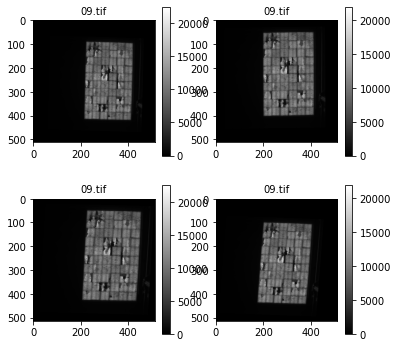

In [ ]:
imgs.head()

## Preprocessing

First, we need to preprocess the images. Here, we need to localize the modules. The localization is later used for an initialization of the pixel-perfect registration:

In [ ]:
imgs_det = preproc.detection.locate_module_and_cells(imgs, rows=6, cols=10, drop_failed=True)

  0%|          | 0/20 [00:00<?, ?it/s]

/content/pvinspect/pvinspect/preproc/_mdetect/locate.py:44: RuntimeWarning:

invalid value encountered in true_divide



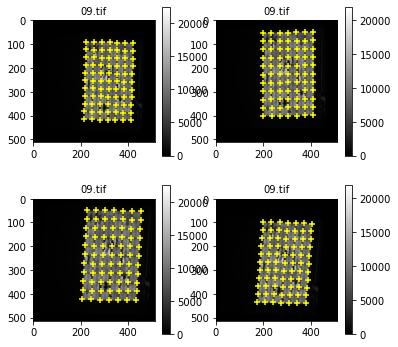

In [ ]:
imgs_det.head()

Next, let's register images. This now conducts the pixel-perfect registration. Here, we also need to define a reference image (in terms of the index from the sequence of LR images) that all other images are registered to:

In [ ]:
imgs_reg = preproc.registration.register_sequence(imgs_det, ref_idx=4)

100%|██████████| 18/18 [00:10<00:00,  1.72it/s]


## SR

Here we've everything well prepared and can apply the SR. Since we don't want to wait too long, we choose to run it on GPU. Furthermore, we specify that we want to increase the resolution by a factor of `4` by using the `magnification` argument. Finally, we also need to specify the image used for initialization of the SR image:

In [ ]:
img_sr = superresolution.multiframe_sr(imgs_reg, magnification=4, ref_idx=4, use_cuda=True)

Ok, this took some time, but here's the result. Note that this is a bit oversharpened. This can be removed by tuning the parameters of the SR. Here, it is caused since we simply downsampled the original images, but SR assumes a point spread function of `0.5` pixels by default, which can, of course, be customized:

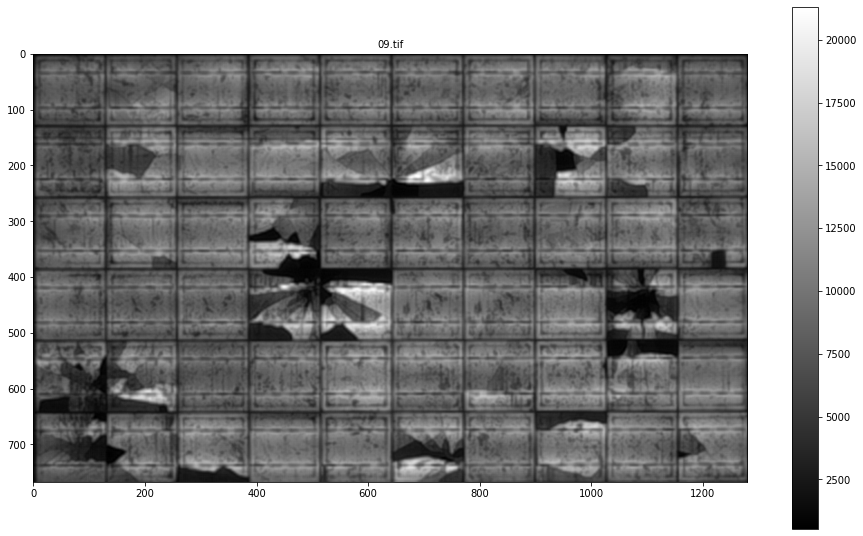

In [ ]:
img_sr.show(figscale=16, show_cell_crossings=False)

Comparing it to a single LR image, we can se quite some improvements:

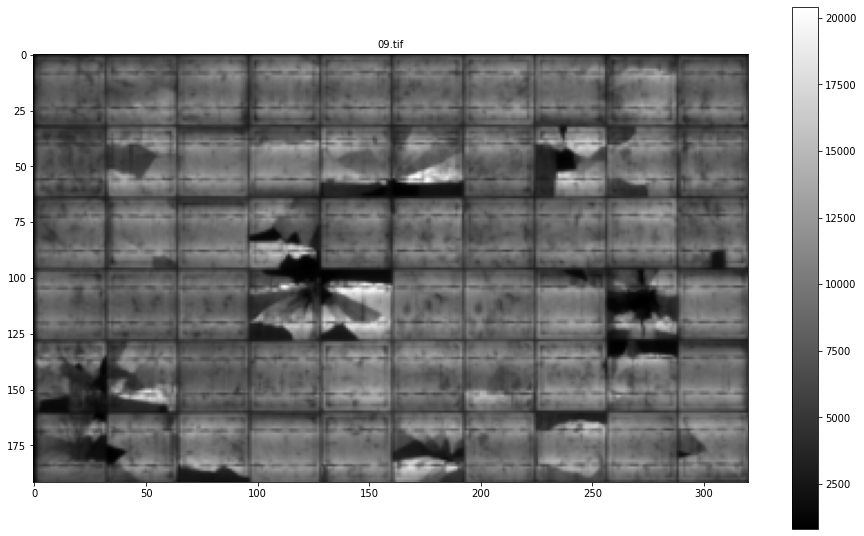

In [ ]:
preproc.detection.segment_module(imgs_reg[4]).show(figscale=16)